In [1]:
# Data Collection
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load your real estate data
data = pd.read_csv('realestate.csv')

In [4]:
# Handle missing values
data = data.dropna()

In [8]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


Exploring Dataset

In [12]:
data = data.dropna()

# Select relevant features for clustering
features = data[['brokered_by', 'price', 'bed','bath']]

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Applying K-Means Clustering

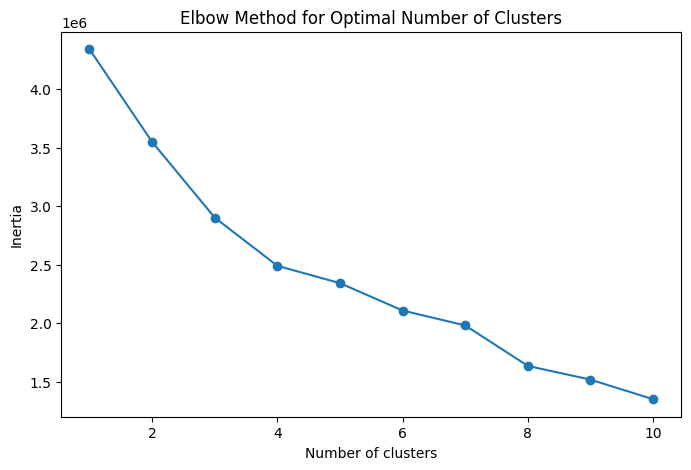

In [13]:
# Determine the number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_clusters = 5  # Choose based on Elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [16]:

data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Cluster
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,0
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,0
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,0
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,1
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,4


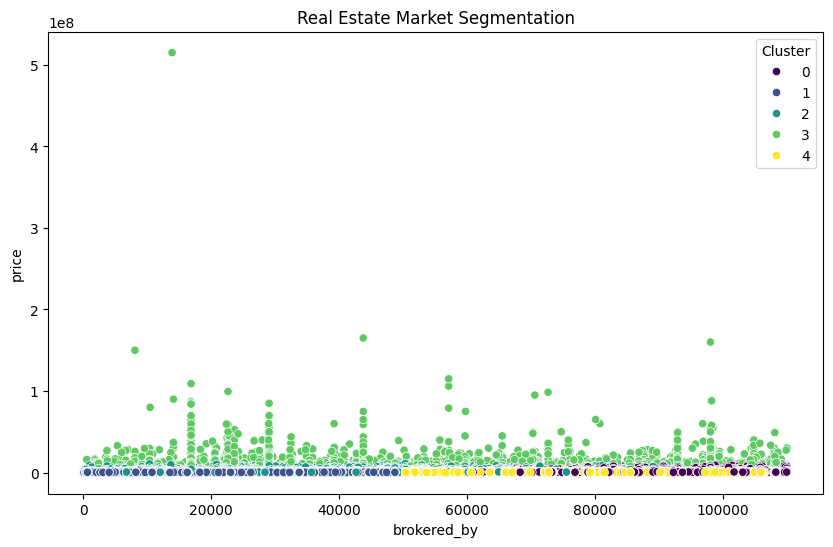

In [17]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='brokered_by', y='price', hue='Cluster', palette='viridis')
plt.title('Real Estate Market Segmentation')
plt.show()

Profiling Segments

In [23]:
# Profile the clusters
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(cluster_data.describe().T)
    print("\n")

Cluster 0 Summary:
                count           mean            std      min        25%  \
brokered_by  162475.0   87519.684795   14779.966556  54721.0   78200.00   
price        162475.0  764117.096039  732394.751218      1.0  389900.00   
bed          162475.0       4.122339       0.880278      1.0       4.00   
bath         162475.0       3.372340       0.879367      1.0       3.00   
acre_lot     162475.0      11.441292     757.878358      0.0       0.15   
street       162475.0  924871.432226  530225.798859    311.0  463511.00   
zip_code     162475.0   57876.259449   30746.417482    610.0   30028.00   
house_size   162475.0    2783.800782    4027.563714    200.0    2079.00   
Cluster      162475.0       0.000000       0.000000      0.0       0.00   

                   50%         75%         max  
brokered_by   84620.00   101233.00    110140.0  
price        554900.00   849000.00  11250000.0  
bed               4.00        4.00        19.0  
bath              3.00        4.00

Interpret the Segments

In [18]:
# Analyze the characteristics of each segment
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(cluster_data.describe())
    print("\n")

Cluster 0 Summary:
         brokered_by         price            bed           bath  \
count  162475.000000  1.624750e+05  162475.000000  162475.000000   
mean    87519.684795  7.641171e+05       4.122339       3.372340   
std     14779.966556  7.323948e+05       0.880278       0.879367   
min     54721.000000  1.000000e+00       1.000000       1.000000   
25%     78200.000000  3.899000e+05       4.000000       3.000000   
50%     84620.000000  5.549000e+05       4.000000       3.000000   
75%    101233.000000  8.490000e+05       4.000000       4.000000   
max    110140.000000  1.125000e+07      19.000000      13.000000   

            acre_lot        street       zip_code    house_size   Cluster  
count  162475.000000  1.624750e+05  162475.000000  1.624750e+05  162475.0  
mean       11.441292  9.248714e+05   57876.259449  2.783801e+03       0.0  
std       757.878358  5.302258e+05   30746.417482  4.027564e+03       0.0  
min         0.000000  3.110000e+02     610.000000  2.000000e+02 

In [24]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Cluster
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,0
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,0
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,0
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,1
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,4


Cluster 0 Summary:
                count           mean            std      min        25%  \
brokered_by  162475.0   87519.684795   14779.966556  54721.0   78200.00   
price        162475.0  764117.096039  732394.751218      1.0  389900.00   
bed          162475.0       4.122339       0.880278      1.0       4.00   
bath         162475.0       3.372340       0.879367      1.0       3.00   
acre_lot     162475.0      11.441292     757.878358      0.0       0.15   
street       162475.0  924871.432226  530225.798859    311.0  463511.00   
zip_code     162475.0   57876.259449   30746.417482    610.0   30028.00   
house_size   162475.0    2783.800782    4027.563714    200.0    2079.00   
Cluster      162475.0       0.000000       0.000000      0.0       0.00   

                   50%         75%         max  
brokered_by   84620.00   101233.00    110140.0  
price        554900.00   849000.00  11250000.0  
bed               4.00        4.00        19.0  
bath              3.00        4.00

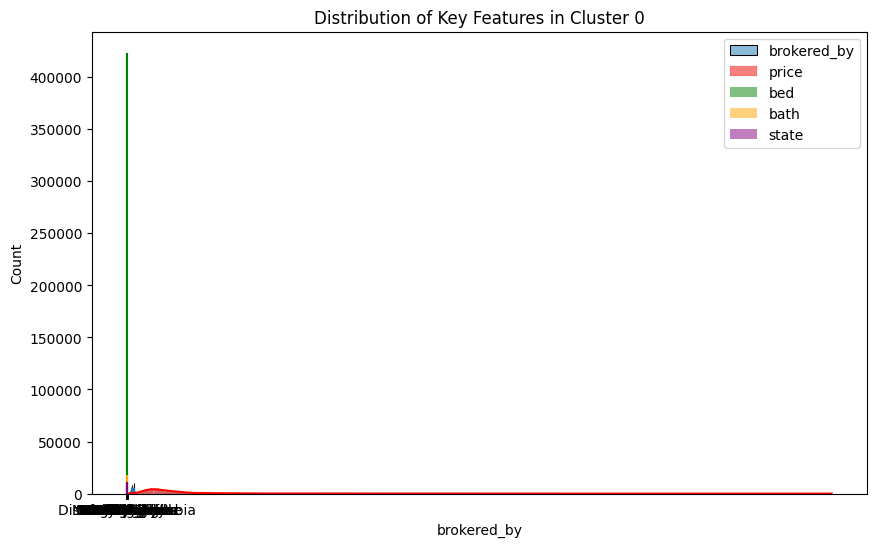

Cluster 1 Summary:
                count           mean            std    min        25%  \
brokered_by  330419.0   24551.606945   12975.190571    0.0   15345.00   
price        330419.0  390628.467180  322738.030824    1.0  199000.00   
bed          330419.0       2.885237       0.666997    1.0       3.00   
bath         330419.0       1.986799       0.614173    1.0       2.00   
acre_lot     330419.0      13.190501     883.344787    0.0       0.13   
street       330419.0  929880.997582  529080.641022  583.0  471504.50   
zip_code     330419.0   54795.173519   29735.072859  623.0   30311.00   
house_size   330419.0    1592.874547     714.479985  100.0    1210.00   
Cluster      330419.0       1.000000       0.000000    1.0       1.00   

                   50%         75%         max  
brokered_by   22611.00    33749.00     50845.0  
price        304385.00   470000.00  10900000.0  
bed               3.00        3.00         6.0  
bath              2.00        2.00         4.0  
acre_

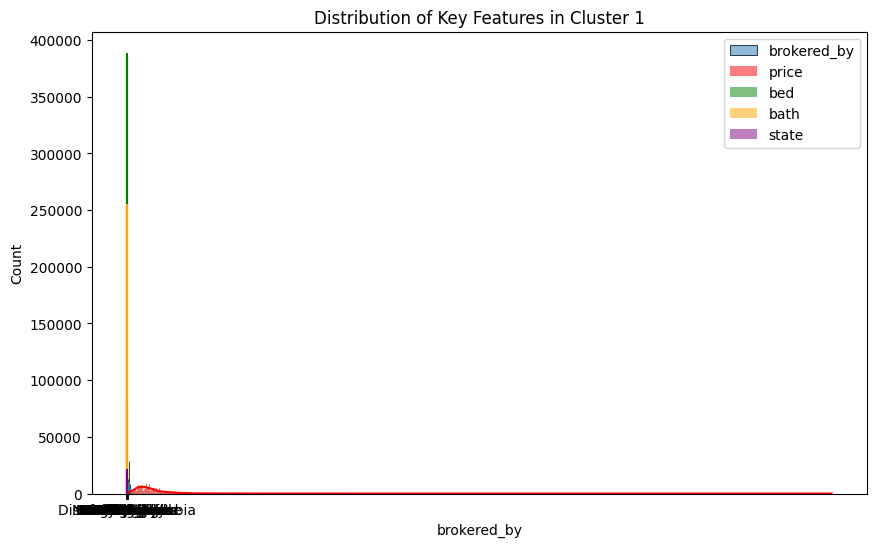

Cluster 2 Summary:
                count           mean           std    min        25%  \
brokered_by  199170.0   32497.290882  1.774155e+04    0.0   16829.00   
price        199170.0  938775.864086  1.000136e+06    1.0  419000.00   
bed          199170.0       4.464869  1.140015e+00    1.0       4.00   
bath         199170.0       3.760868  1.187963e+00    1.0       3.00   
acre_lot     199170.0      13.340736  7.727928e+02    0.0       0.16   
street       199170.0  928882.038465  5.302621e+05   97.0  466474.25   
zip_code     199170.0   53506.369338  3.054970e+04  646.0   27834.00   
house_size   199170.0    3186.147623  1.749318e+03  198.0    2309.00   
Cluster      199170.0       2.000000  0.000000e+00    2.0       2.00   

                   50%         75%         max  
brokered_by   30807.00    51427.00    110138.0  
price        609000.00   995000.00  11500000.0  
bed               4.00        5.00        33.0  
bath              3.00        4.00        25.0  
acre_lot       

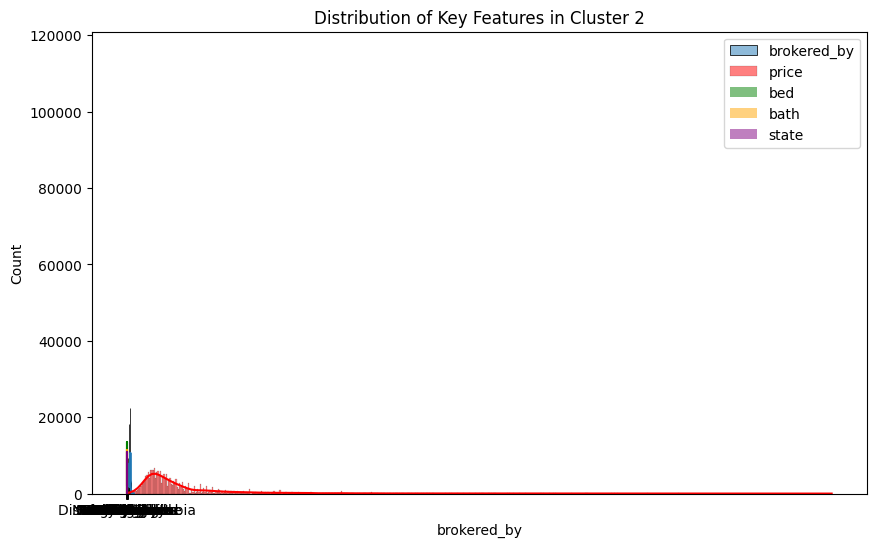

Cluster 3 Summary:
              count          mean           std       min         25%  \
brokered_by  2312.0  5.051680e+04  3.281035e+04     515.0    22611.00   
price        2312.0  1.531411e+07  1.616647e+07  189000.0  9399750.00   
bed          2312.0  9.886678e+00  1.752654e+01       1.0        5.00   
bath         2312.0  1.098659e+01  1.254563e+01       1.0        7.00   
acre_lot     2312.0  3.490799e+01  6.712010e+02       0.0        0.36   
street       2312.0  9.366288e+05  5.332150e+05    6247.0   464512.50   
zip_code     2312.0  6.328996e+04  3.328738e+04     840.0    33156.00   
house_size   2312.0  9.772149e+03  6.334553e+03     500.0     6100.00   
Cluster      2312.0  3.000000e+00  0.000000e+00       3.0        3.00   

                    50%          75%           max  
brokered_by     43753.0     81807.75  1.099820e+05  
price        12237500.0  16998250.00  5.150000e+08  
bed                 6.0         8.00  4.440000e+02  
bath                8.0        11.00  

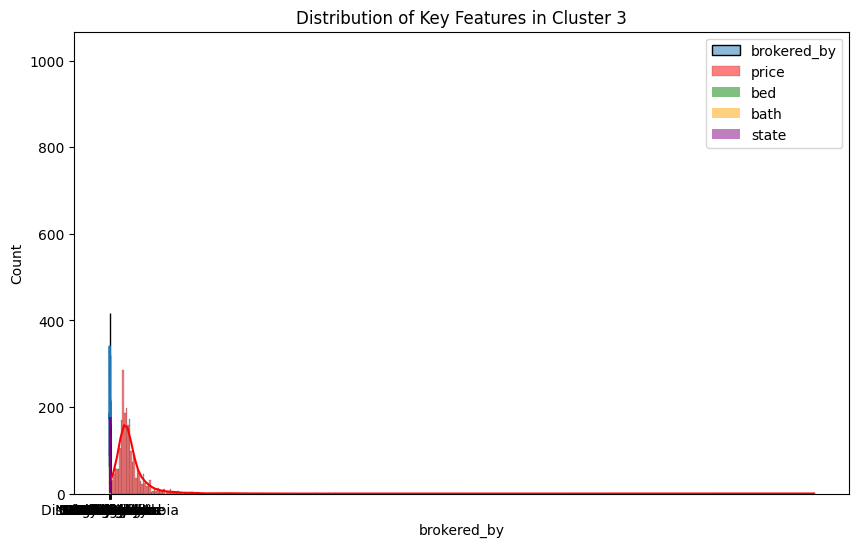

Cluster 4 Summary:
                count           mean            std      min        25%  \
brokered_by  390533.0   74781.325376   17661.302234  48411.0   56729.00   
price        390533.0  362041.172482  261184.551247      1.0  199900.00   
bed          390533.0       2.851995       0.647032      1.0       3.00   
bath         390533.0       1.932841       0.587788      1.0       2.00   
acre_lot     390533.0      10.278203     742.122648      0.0       0.13   
street       390533.0  930282.999321  529383.823445   1796.0  470569.00   
zip_code     390533.0   57166.885887   29332.916677    602.0   32504.00   
house_size   390533.0    1575.707835    3265.697083    100.0    1191.00   
Cluster      390533.0       4.000000       0.000000      4.0       4.00   

                   50%         75%        max  
brokered_by   76125.00    84634.00   110142.0  
price        299990.00   449900.00  7990000.0  
bed               3.00        3.00        6.0  
bath              2.00        2.00    

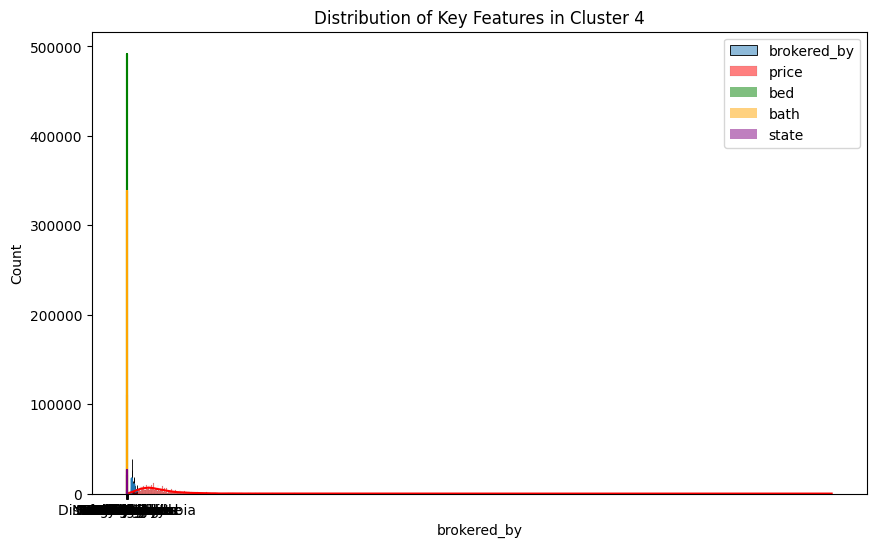

In [26]:
# Calculate additional statistics
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(cluster_data.describe().T)
    
    # Visualize the distribution of key features within the cluster
    plt.figure(figsize=(10, 6))
    sns.histplot(cluster_data['brokered_by'], kde=True, label='brokered_by')
    sns.histplot(cluster_data['price'], kde=True, color='red', label='price')
    sns.histplot(cluster_data['bed'], kde=True, color='green', label='bed')
    sns.histplot(cluster_data['bath'], kde=True, color='orange', label='bath')
    sns.histplot(cluster_data['state'], kde=True, color='purple', label='state')
    plt.legend()
    plt.title(f'Distribution of Key Features in Cluster {cluster}')
    plt.show()

Customising the Market Mix

In real estate market segmentation, customizing the marketing mix entails modifying the conventional 4Ps—Product, Price, Place, and Promotion—to suit the unique requirements and inclinations of various market segments. For instance, in a high-income market, the product offerings would consist of opulent homes with first-rate amenities, while the pricing tactics might emphasize high-end financing choices and value-added services. Product options for middle-class consumers can include reasonably priced housing with standard features, and pricing methods might include discounts or flexible payment schedules. Place tactics would differ according to the locations of the segments; suburban segments would give priority to large homes with community amenities, while urban segments might need properties in city centers close to public transportation. 

Evaluation and Monitoring

Evaluate the clusters and visualize the results to interpret the segments. 
When it comes to real estate market segmentation, evaluation and monitoring entail regularly determining how effective a given segmentation strategy is and adjusting as needed to maximize results. Key performance indicators (KPIs) for each market sector, including sales volume, market share, customer happiness, and return on investment (ROI), are tracked as part of this process. Real estate firms may track the results of their tailored marketing campaigns and spot new trends and changes in consumer behavior by utilizing data analytics and customer feedback technologies. Companies may improve their marketing mix and keep it in line with the changing needs of various groups by routinely analyzing these metrics. Furthermore, keeping an eye on market dynamics and competitor activity makes it easier to foresee and react to changes early on, preserving a competitive advantage and promoting long-term success.